In [3]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])

# Create additional features (e.g., moving average)
df_cleaned['SMA_10'] = df_cleaned['Price'].rolling(window=10).mean()

# Save the dataset with additional features
df_cleaned.to_csv('BrentOilPrices_Features.csv', index=False)

print("Feature engineering completed and data saved successfully.")


Feature engineering completed and data saved successfully.


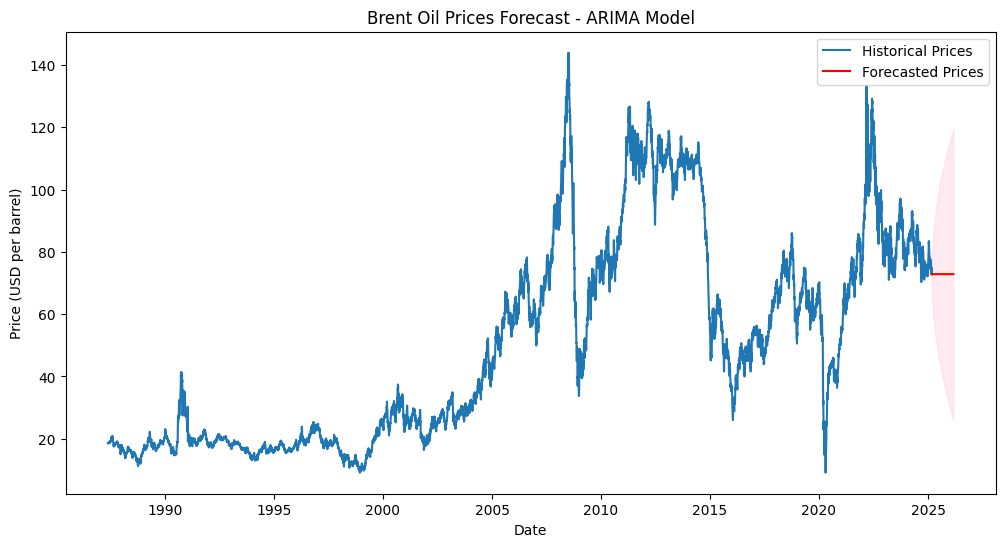

ARIMA model training and forecasting completed successfully.


In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset with additional features
df_features = pd.read_csv('BrentOilPrices_Features.csv', parse_dates=['Date'])

# Define the ARIMA model
model = ARIMA(df_features['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future prices
forecast_length = 365
forecast = model_fit.get_forecast(steps=forecast_length)
forecast_prices = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_features['Date'], df_features['Price'], label='Historical Prices')
future_dates = pd.date_range(start=df_features['Date'].iloc[-1], periods=forecast_length, freq='D')
plt.plot(future_dates, forecast_prices, label='Forecasted Prices', color='r')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Brent Oil Prices Forecast - ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

print("ARIMA model training and forecasting completed successfully.")


In [6]:
import pickle
# Save the ARIMA model
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

print("ARIMA model saved successfully.")

ARIMA model saved successfully.


Mean Squared Error: 3.7549282565546194


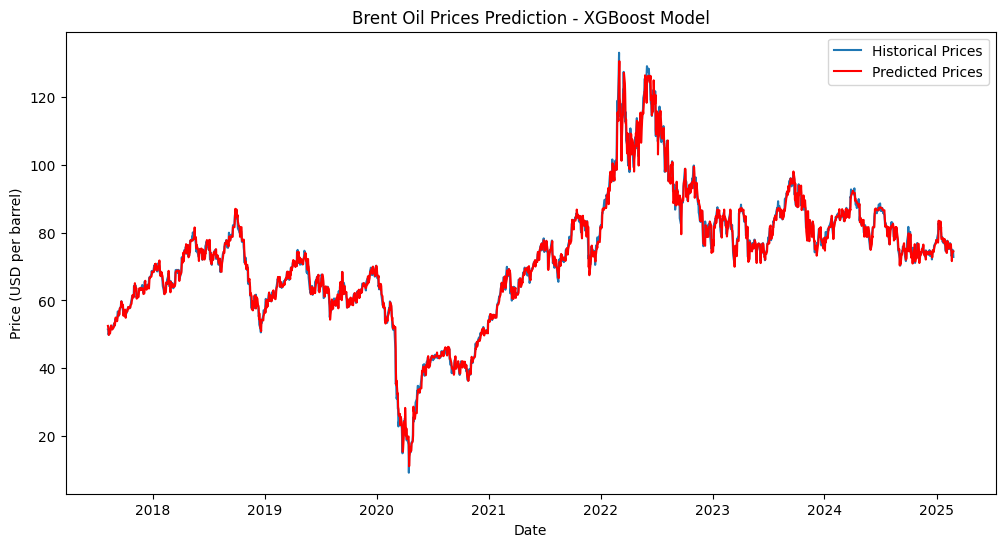

XGBoost model training and prediction completed successfully.


In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset with additional features
df_features = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/BrentOilPrices_Features.csv', parse_dates=['Date'])

# Create lagged features
def create_lagged_features(data, lag=1):
    df = data.copy()
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['Price'].shift(i)
    return df.dropna()

lag = 5
df_lagged = create_lagged_features(df_features, lag)
X = df_lagged.drop(['Price', 'Date'], axis=1)
y = df_lagged['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Align the indices for plotting
plot_range = df_features['Date'][len(X_train) + lag : len(X_train) + lag + len(y_test)]

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(plot_range, y_test, label='Historical Prices')
plt.plot(plot_range, predictions, label='Predicted Prices', color='r')
plt.title('Brent Oil Prices Prediction - XGBoost Model')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

print("XGBoost model training and prediction completed successfully.")


In [17]:
import joblib
# Save the model
joblib.dump(model, 'xgboost_model.pkl')
print("XGBoost model saved successfully.")

XGBoost model saved successfully.


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


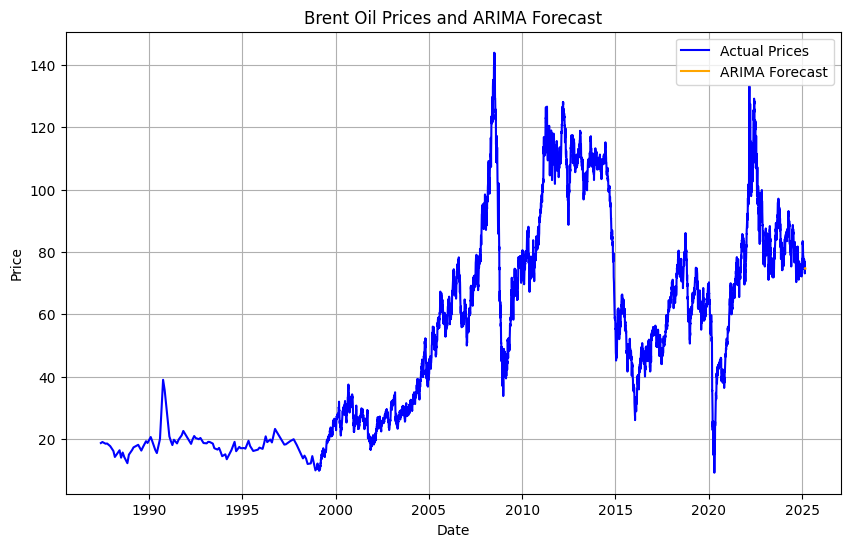

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Load the saved ARIMA model
arima_model = joblib.load('D:/KAIM/Week 12/KAIM WEEK12/arima_model.pkl')

# Load the dataset (ensure it contains the 'Price' column and 'Date' as index)
data = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/Imputed_Economic_Brent_Data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Generate the forecast using the loaded model
forecast = arima_model.forecast(steps=10)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Actual Prices', color='blue')

# Create a forecast index based on the last available date
forecast_index = pd.date_range(data.index[-1], periods=10, freq='D')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='orange')

# Add plot title and labels
plt.title('Brent Oil Prices and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


VAR model loaded successfully.
Forecast Results:
                Price    GDP_Growth  Inflation_Rate  Unemployment_Rate
2025-02-28  74.631288  14062.698942      201.752170           5.763417
2025-03-01  74.609289  14043.979604      201.783851           5.767525
2025-03-02  74.645818  14036.474030      201.661966           5.763297
2025-03-03  74.638566  14041.835122      201.773214           5.761072
2025-03-04  74.628052  14044.736978      201.820091           5.761788
2025-03-05  74.620019  14046.278874      201.871906           5.762148
2025-03-06  74.614729  14045.122900      201.886486           5.762157
2025-03-07  74.608449  14045.707345      201.903549           5.761851
2025-03-08  74.601980  14046.662167      201.939287           5.761707
2025-03-09  74.595662  14047.393195      201.963687           5.761690
Forecast saved successfully as 'VAR_Forecast_Results.csv'.


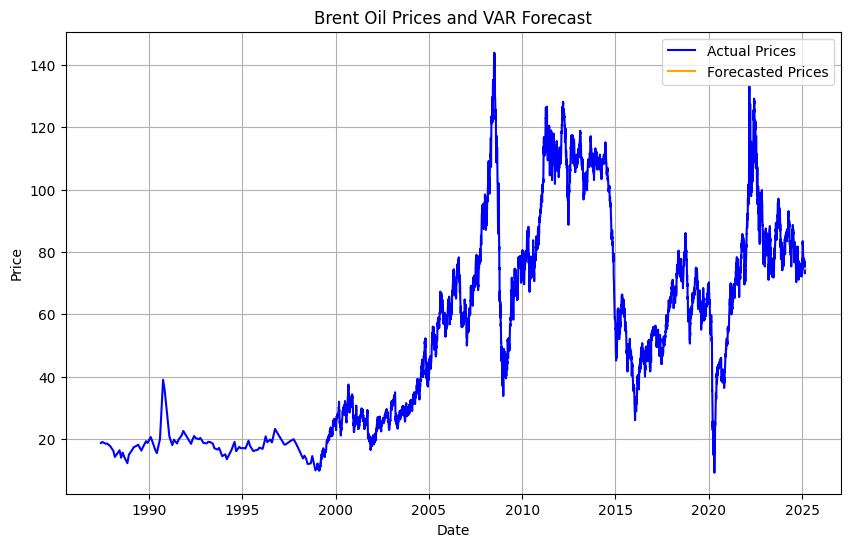

In [4]:
import joblib
import pandas as pd
import numpy as np

# Load the saved VAR model
var_model = joblib.load('D:/KAIM/Week 12/KAIM WEEK12/VAR_model.pkl')
print("VAR model loaded successfully.")

# Load the dataset (ensure it contains relevant variables and 'Date' as index)
data = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/Imputed_Economic_Brent_Data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

# Ensure the dataset contains the same variables used for training the VAR model
var_data = data[['Price', 'GDP_Growth', 'Inflation_Rate', 'Unemployment_Rate']]  # Adjust column names as needed

# Get the last 'k_ar' rows to use as input for forecasting
k_ar = var_model.k_ar
input_data = var_data.values[-k_ar:]  # Use the last k_ar rows of the dataset

# Forecast the next 10 periods
forecast = var_model.forecast(y=input_data, steps=10)

# Convert forecast results into a DataFrame for better readability
forecast_index = pd.date_range(start=data.index[-1], periods=10, freq='D')  # Adjust frequency if needed
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=var_data.columns)

print("Forecast Results:")
print(forecast_df)

# Optional: Save the forecast results to a CSV file
forecast_df.to_csv('VAR_Forecast_Results.csv', index=True)
print("Forecast saved successfully as 'VAR_Forecast_Results.csv'.")

import matplotlib.pyplot as plt

# Plot actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Actual Prices', color='blue')
plt.plot(forecast_index, forecast_df['Price'], label='Forecasted Prices', color='orange')

plt.title('Brent Oil Prices and VAR Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

